In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
from IPython.display import display
from sympy.utilities.lambdify import lambdify
from sympy import *

In [2]:
#kpc limits, visual guess based on the galaxy in the image chosen:
minkpc=0
maxkpc=25


w=3970 #width of the square image
h=w
#center of galaxy:
c_x=w/2
c_y=h/2.2

#galaxy parameters
rcut=2.4 #cutoff radius, kpc for ngc5005...
rho00=.31e9 #Msun/kpc^2 for ngc5533

G = 4.30091e-6    #gravitational constant (kpc/solar mass*(km/s)^2)

#visual scaling
scale=.2e9 #the number of theoretical black holes each graphed dot actually presents, somewhat arbitrary but 
#should be a number that does't require the plotting too many or too few dots representing bh's
#units: scale = [#number of actual black holes / plotted dot]
kpctopixels=50 #visual scaling, varies depending on size of galaxy image (and actual size of galaxy)
r1=minkpc*kpctopixels
r2=maxkpc*kpctopixels

#for number of black holes slider
Max=100 #max number of blackholes
best_M=.5*Max #default # of bh's for slider
stepN=.1*Max #step of # of bh's slider
Min=1# min # of black holes

#for blackhole mass slider:
minmass=.1 #solar masses, arbitrary
maxmass=3.7 #solar masses, just smaller then the smallest black hole ever discovered according to
#https://www.scientificamerican.com/gallery/the-smallest-known-black-hole/
start=.5*maxmass #default mass value for slider


#calculate the mass distribution on the galaxy using parametrs of similar galaxies (???)
r = symbols('r')
X=r/rcut
Z = rho00/(X*(1+X)**2) #NFW (dark halo) density profile. I'm assuming Rs is cutoff radius. is this correct?
RHO=4*np.pi*r**2*Z #
RRR=integrate(RHO)
func = lambdify(r, RRR,'numpy') #returns a numpy-ready function
rr=np.linspace(minkpc,maxkpc,int(Max)) #kpc
M = func(rr) #reprepresents the total mass [Msun] at each point in the array rr [kpc]

rrr = np.random.uniform(r1,r2,int(Max))

angle=np.random.uniform(0,2*np.pi,int(Max)) #angle 0 to 360 degrees for fulle circle (donut) for each bracket


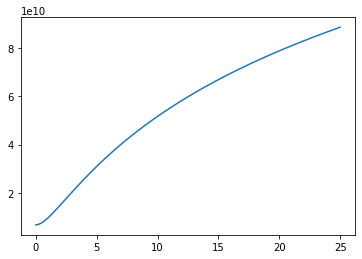

In [3]:
plt.plot(rr,M)

In [8]:
from sympy.utilities.lambdify import lambdify
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
from IPython.display import display



def f(arraysize,Mbh):
    
    
    #fractions: now changing the number of dots plottd within each bracket, which changes as the slider 
    #variable ("arraysize") changes
    
    #and trim to the first x elements of the pre-caclated radius arrays for each bracket
    arraysize=int(arraysize) #units: dot
    re = rrr[:arraysize]
    anglee=angle[:arraysize]
    
    #plot for each bracket, two equations for each bracket
    y=c_y+re*np.sin(anglee) #y coordinates
    x=c_x+re*np.cos(anglee) #x coordinates
    img = plt.imread("A_spiral_snowflake.jpg") #import special snowflake ngc 6814, which has visual diameter about 27.6kpc
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    f.set_figheight(15)
    f.set_figwidth(30)
    
    #below: changing the physical size of the plotted dots as the bh mass slider changes. the if else statement is fancy
    #but not necessary
    
    
    #WIP: getting so that the halo component/total RC curve updates as bh widgets update
   
    Me=Mbh*arraysize*scale*M/max(M) #units: Msun/bh * dot *bh/dot = Msun
    V = np.sqrt(Me*G/rcut) #is it rc or just r???? units: km/s
    
    
    
    Mbh=1.5*Mbh #judging by eye
    if .1<=Mbh<1:
        Mbh=Mbh**1.5
    elif 1<=Mbh<2:
        Mbh=Mbh**2
    else:
        Mbh=Mbh**3 #display size of each marker
        
    #ax1.plot(c_x+r1c*10,c_y,color="pink",marker='x')
    ax1.scatter(x,y,color="r",marker='o',s=Mbh)
    
    ax1.imshow(img)
    ax1.axis('off')
    ax2.plot(rr,V)
    ax2.set_xlim([minkpc, maxkpc])
    ax2.set_ylim([0, 220])
    ax2.set_title('NGC ????',fontsize = 20)
    ax2.set_ylabel('Velocity [km/s]',fontsize = 20)
    ax2.set_xlabel('radius [kpc]',fontsize = 20)
    
style = {'description_width': 'initial'}
layout = {'width':'600px'}

################################
######## Define Sliders ########
################################

#mass of each black hole
Mbh = FloatSlider(min=minmass, max=maxmass, step=minmass, 
                value=start,
                description='Mass of each lil black holes [Msun]', 
                readout= True,
                readout_format='.1f', 
                orientation='horizontal', 
                style=style, layout=layout)

#number of projected black dots slider
arraysize = FloatSlider(min=Min, max=Max, step=stepN, 
                value=best_M, 
                description='Number of lil black holes multiplied by scale %.0e'%scale, 
                readout= True,
                readout_format='.2d', 
                orientation='horizontal', 
                style=style, layout=layout)



def interactive_plot(f):
    interact = interactive(f, arraysize=arraysize,Mbh=Mbh,continuous_update=False)
    return interact
VBox([interactive_plot(f)])

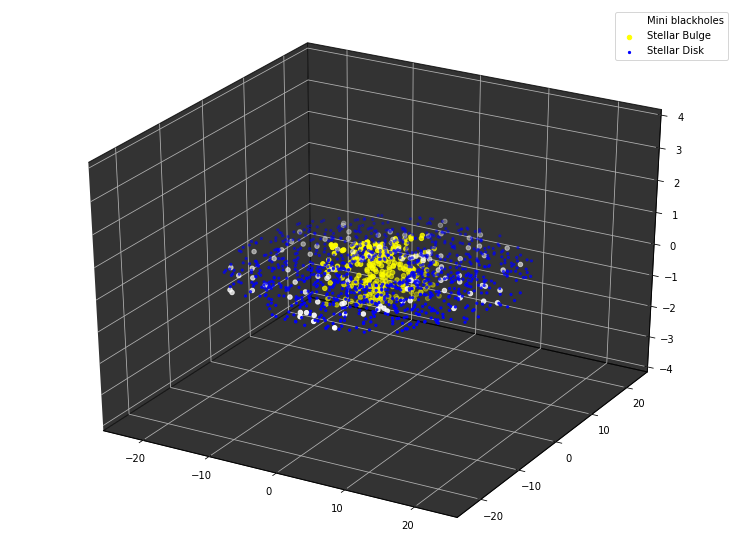

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

N=1000
X=25 #kpc
Y=X
Z=4 #kpc

#plotting disk
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yd=r*np.sin(angle) #y coordinates
xd=r*np.cos(angle) #x coordinates
zd=0

#plotting bulge
N=250
r2b=Z
r1b=-Z
rb = np.random.uniform(r1b,r2b,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yb=rb*np.sin(angle)+rb*np.cos(angle) #y coordinates
xb=rb*np.cos(angle) #x coordinates
r1bb=-Z/4
r2bb=-r1
rbb = np.random.uniform(r1bb,r2bb,N)
zb=np.linspace(-1,1,N)

#plotting black holes
N=100
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
ybh=r*np.sin(angle) #y coordinates
xbh=r*np.cos(angle) #x coordinates
zbh=0



# create the figure
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xbh, ybh, zbh, color='white',label='Mini blackholes',zorder=1)
ax.scatter3D(yb, yb, zb, color='yellow',label='Stellar Bulge',zorder=2)
ax.scatter3D(xd, yd, zd, color='blue',marker='.',label='Stellar Disk',zorder=3)
ax.set_xlim((-X,X))
ax.set_ylim((-Y,Y))
ax.set_zlim((-Z,Z))
ax.legend()
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.w_xaxis.set_pane_color((0, 0, 0, .8))
ax.w_yaxis.set_pane_color((0, 0, 0, .8))
ax.w_zaxis.set_pane_color((0, 0, 0, .8))

plt.show()